In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  
y_train = np.array([0, 0, 0, 1, 1, 1])                                           

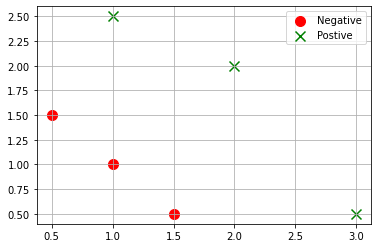

In [24]:
negatives_x1 = (X_train[y_train == 0])[:, 0]
negatives_x2 = (X_train[y_train == 0])[:, 1]

positives_x1 = (X_train[y_train == 1])[:, 0]
positives_x2 = (X_train[y_train == 1])[:, 1]

plt.scatter(negatives_x1, negatives_x2, c='r', label='Negative', s=100)
plt.scatter(positives_x1, positives_x2,
           c='g', label='Postive', marker='x', s=100)
plt.grid()
plt.legend()
plt.show()

In [ ]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g 


def logistic_cost(X, y, w, b):
    